<a href="https://colab.research.google.com/github/nrally1/FutureMakers2022/blob/main/Day_6_Introduction_to_CNNs_NR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

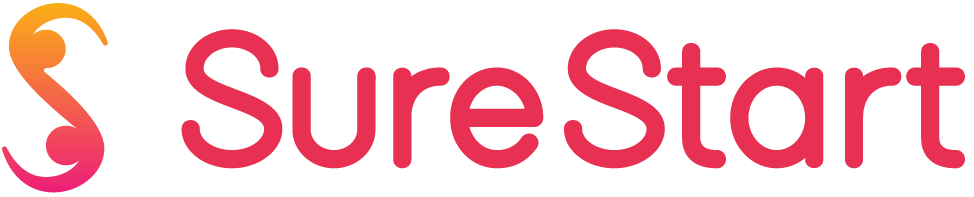

#Day 6 Objectives:
* To introduce you to a very popular type of Neural Network: Convolutional Neural Networks (CNNs). 
* To acquaint you with model evaluation metrics. 
* To familiarize you with the effect of training data size on a model’s predictive power.


#Introduction to CNNs
Artificial Neural Networks (ANNs) are used for tackling a broad spectrum of prediction and classification problems, and for scaling up applications which would otherwise require intractable amounts of data. ML has been witnessing a “Neural Revolution” since the mid 2000s, as ANNs found application in tools and technologies such as search engines, automatic translation, or video classification. 

Convolutional neural networks are an improvement over our Artificial neural networks (ANNs) we have learned so far. And the idea that the improvement is as the name suggests, convolutions. 

A convolution is a filter that passes over an image, processes it, and extracts the important features. And while the idea of using filters on images exists before CNNs did, they are used here consecutively so that these filters compound to bigger patterns in a set of features. Such filters can be applied over many types of media but we shall be using them on images. 

Lets look into the type of filters we can see in practice -

In [42]:
import numpy as np
import tensorflow as tf
import cv2
from scipy import misc
import matplotlib.pyplot as plt

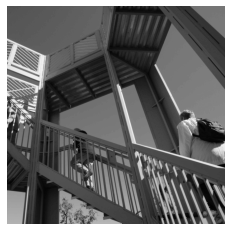

In [43]:
img = misc.ascent()
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(img)
plt.show()

We can see that this is an image of a stairwell. There are lots of features in here that we can play with if we can isolate them -- for example there are strong vertical lines. Let's also get the dimensions of the image so we can loop over it later.

In [44]:
size_x = img.shape[0]
size_y = img.shape[1]
weight = 1

print("Width of the image:", size_x, "pixels")
print("Height of the image:", size_y, "pixels")

Width of the image: 512 pixels
Height of the image: 512 pixels


*Now* we can create filters as a 3x3 array. 

#Filters
Filtering is a neighborhood operation, in which the value of any given pixel in the output image is determined by applying some algorithm to the values of the pixels in the neighborhood of the corresponding input pixel. A pixel's neighborhood is some set of pixels, defined by their locations relative to that pixel.

In [45]:
# Filters to detect horizontal lines

# this is the most straight forward horizontal line detection filter
# but does it work?
kernel_1h =  np.array([[0,0,0],
                      [1,1,1],
                      [0,0,0]])

# this is called the Sobel operator for horizontal edge detection 
kernel_2h = np.array([[-1,0,1],
                      [-2,0,2],
                      [-1,0,1]],np.float32)

# this is called the Prewitt operator for horizontal edge detection 
kernel_3h = np.array([[1,0,-1],
                      [1,0,-1],
                      [1,0,-1]],np.float32)

In [46]:
# Filters to detect vertical lines

# this is the most straight forward vertical line detection filter
# but does it work?
kernel_1v = np.array([[0,1,0],
                      [0,1,0],
                      [0,1,0]],np.float32)

# this is called the Sobel operator for vertical edge detection 
kernel_2v = np.array([[-1,-2,-1],
                      [0,0,0],
                      [1,2,1]])

# this is called the Prewitt operator for vertical edge detection 
kernel_3v = np.array([[1,1,1],
                      [0,0,0],
                      [-1,-1,-1]])

Now let's create a convolution operation. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

*Convolution* refers to the mathematical combination of two functions to produce a third function. It merges two sets of information. [Source](https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/)

In CNNs, a convolution operation works as follows: two matrices (portion of the input and kernel/filter) are multiplied element-wise and all the resulting values are summed together to generate a single value. That single value becomes an element of the feature map, this happens for each portion of the image, generating the entire feature map.

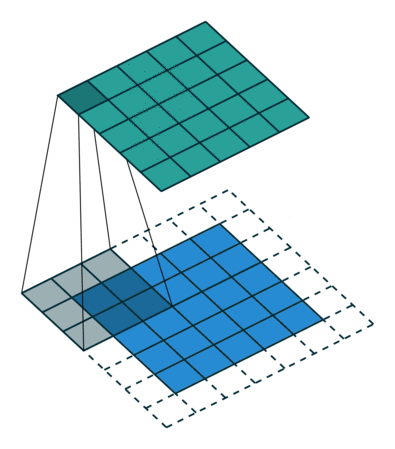


i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image.

# Convolution Function

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.


In [47]:
def convolute(i, size_x, size_y, filter):
  transformed = np.ones(i.shape)
  for x in range(1, size_x-1):
    for y in range(1, size_y-1):
                
        convolution = 0.0
        convolution = convolution + (i[x - 1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x + 1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight

        if(convolution<0):
          convolution=0
        if(convolution>255):
          convolution=255
        transformed[x, y] = convolution
  return transformed


This is perfect for computer vision, because often it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less... because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

In [48]:
# horizontal filter
img_horizontally_transformed_1 = convolute(img, size_x, size_y, kernel_1h)
img_horizontally_transformed_2 = convolute(img, size_x, size_y, kernel_2h) 
img_horizontally_transformed_3 = convolute(img, size_x, size_y, kernel_3h) 

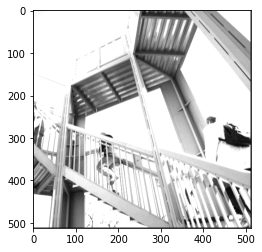

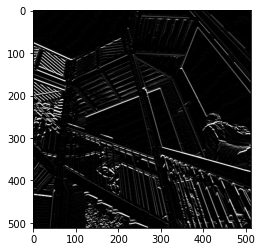

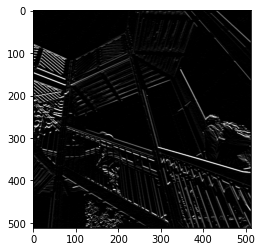

In [49]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(img_horizontally_transformed_1)
plt.show()  

plt.imshow(img_horizontally_transformed_2)
plt.show()  

plt.imshow(img_horizontally_transformed_3)
plt.show()  

In [50]:
# vertical filter
img_vertically_transformed_1 = convolute(img, size_x, size_y, kernel_1v)
img_vertically_transformed_2 = convolute(img, size_x, size_y, kernel_2v)
img_vertically_transformed_3 = convolute(img, size_x, size_y, kernel_3v)

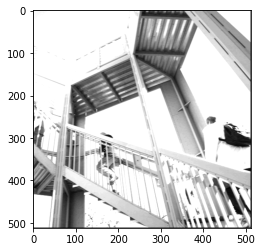

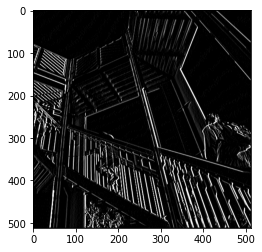

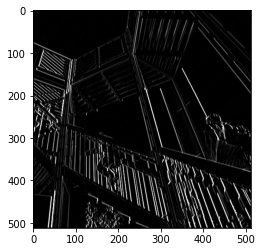

In [51]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)

plt.imshow(img_vertically_transformed_1)
plt.show()  

plt.imshow(img_vertically_transformed_2)
plt.show()  

plt.imshow(img_vertically_transformed_3)
plt.show()  

## Question 1

In the above coding examples there are multiple filters provided to serve as horizontal and vertical edge detectors. One is a dummy function and the next two are professionally used filters for the tasks. 

State how a filter can determine if a vertical or a horizonal edge exists in an image.


The filter can take deviations in the digital image, where the  A pixel may change its value when there is an edge, and this change in color results in a value that the filter gets which is equal to 255, and this shows up on the image as the white colored pixel.

## Question 2
 Find and utilize filters for the following usecases:
 1. Detecting Corners
 2. Blur
 3. Left/Right Shift
 4. Rotation (for mentors: how do we make a 3x3 convolution which performs rotaion) 
 5. Sharpen

Can these be used for the purpose of Deep Learning?

If they can not be used, why can edge detection be used?

And if they can be used, which ones are of use?

\<*Type your answer here*\>

In [52]:
import math

[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]
[[  1.   1.   1. ...   1.   1.   1.]
 [  1. 254. 254. ... 255. 255.   1.]
 [  1. 255.   0. ...   1.   0.   1.]
 ...
 [  1. 255. 255. ...   0.   0.   1.]
 [  1. 255. 255. ...   0.   0.   1.]
 [  1.   1.   1. ...   1.   1.   1.]]


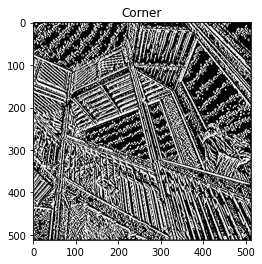

[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]
[[  1.    1.    1.  ...   1.    1.    1. ]
 [  1.  148.  148.8 ... 210.6 210.6   1. ]
 [  1.  147.6 148.6 ... 210.6 210.6   1. ]
 ...
 [  1.  255.  255.  ... 102.  104.8   1. ]
 [  1.  255.  255.  ...  97.2 103.    1. ]
 [  1.    1.    1.  ...   1.    1.    1. ]]


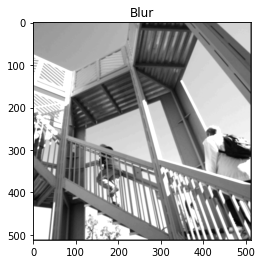

[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]
[[  1.   1.   1. ...   1.   1.   1.]
 [  1. 255. 255. ... 255. 255.   1.]
 [  1. 255. 255. ... 255. 255.   1.]
 ...
 [  1. 255. 255. ... 255. 255.   1.]
 [  1. 255. 255. ... 255. 255.   1.]
 [  1.   1.   1. ...   1.   1.   1.]]


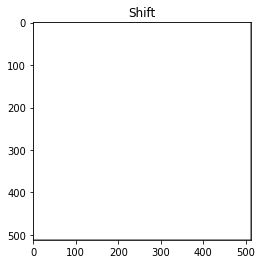

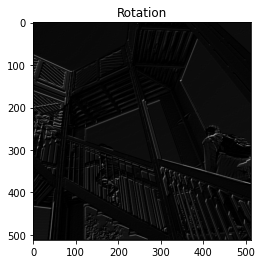

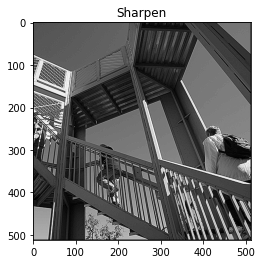

In [53]:
""" Enter your code for Question 2 here """
#Filters

# Change corner detection filter values here

kernel_corner = np.array([[255,0,0],
                        [0,0,0],
                        [-1,0,1]])
print(img)
img_corner = convolute(img, size_x, size_y, kernel_2h)
img_corner = convolute(img_corner, size_x, size_y, kernel_2v)
img_corner = convolute(img_corner, size_x, size_y, kernel_corner)

plt.gray()
plt.grid(False)
print(img_corner)
plt.imshow(img_corner)
plt.title('Corner')
plt.show()


# Change blur filter values here

kernel_blurrings = ((1/10) * np.array([[2,2,2],
                        [2,2,2],
                        [2,2,2]]))
print(img)
img_blurs = convolute(img, size_x, size_y, kernel_blurrings)

plt.gray()
plt.grid(False)
print(img_blurs)
plt.imshow(img_blurs)
plt.title('Blur')
plt.show()

## use the same kernel / convolution / plotting code as above - make sure you change the variable names accordingly

# Change shift filter values here

## use the same kernel / convolution / plotting code as above - make sure you change the variable names accordingly
# Change corner detection filter values here

kernel_shift = np.array([[1,0,1],
                        [0,1,0],
                        [0,0,1]])

img = misc.ascent()
print(img)
img_shift = convolute(img, size_x, size_y, kernel_shift) # we might not be able to see shift by 1 pixel clearly, that's why we perform the shift 5 times
img_shift = convolute(img_shift, size_x, size_y, kernel_shift)
img_shift = convolute(img_shift, size_x, size_y, kernel_shift)
img_shift = convolute(img_shift, size_x, size_y, kernel_shift)
img_shift = convolute(img_shift, size_x, size_y, kernel_shift)

plt.gray()
plt.grid(False)
print(img_shift)
plt.imshow(img_shift)
plt.title('Shift')
plt.show()


# Change rotation filter values here

## use the same kernel / convolution / plotting code as above - make sure you change the variable names accordingly

kernel_rotation = np.array([[math.cos(90),-math.sin(60),0],
                            [math.sin(60),math.cos(90),0],
                            [0,0,1]])
img_rotation = convolute(img, size_x, size_y, kernel_rotation)

plt.gray()
plt.grid(False)
plt.imshow(img_rotation)
plt.title('Rotation')
plt.show()


# Change sharpen filter values here

## use the same kernel / convolution / plotting code as above - make sure you change the variable names accordingly

kernel_sharpen = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])
img_sharpen = convolute(img, size_x, size_y, kernel_sharpen)

plt.gray()
plt.grid(False)
plt.imshow(img_sharpen)
plt.title('Sharpen')
plt.show()


#Maxpool 
Suppose we are working with this matrix:

$\begin{pmatrix}
1 & 1 & 2 & 2 \\
3 & 3 & 4 & 4 \\
5 & 5 & 6 & 6 \\
7 & 7 & 8 & 8
\end{pmatrix}$

We have some sample input of size 4 x 4, and we're assuming that we have a 2 x 2 filter size with a stride (the number of pixels shifts over the input matrix) of 2 to do max pooling on this input channel.

For our first 2 x 2 region, and we can see the max value of this region is 3, and so we store that over in the output channel. Next, we slide over by 2 pixels, and we see the max value in the next region is 4. As a result, we store the value over in the output channel. Since we've reached the edge, we now move back over to the far left, and go down by 2 pixels. Here, the max value in the blue region is 7, and we store that here in our output channel. Similarly we get 8 in the last region.

This completes the process of max pooling on this sample 4 x 4 input channel, and the resulting output channel is this 2 x 2 block. As a result, we can see that our input dimensions were again reduced by a factor of two.

Output:\
$\begin{pmatrix}
3 & 4  \\
7 & 8 
\end{pmatrix}$

Alright, we know what max pooling is and how it works, so let's see an example?



In [54]:
def maxpool(img, size_x,size_y, pool):
  transformed_i = np.zeros([size_x//pool,size_y//pool])
  if pool<size_x and pool<size_y:
    for i in range(size_x // pool):
      for j in range(size_y // pool):
          transformed_i[i,j] = max(map(max, img[(i * pool):(i * pool + pool), (j * pool):(j * pool + pool)]))
  return transformed_i

In [55]:
img_pooled = maxpool(img,size_x,size_y,2)

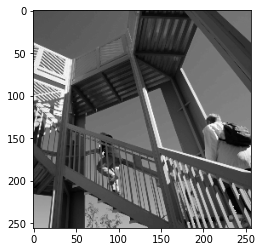

In [56]:
# Plot the image. Note the size of the axes -- they are 256 by 256
plt.gray()
plt.grid(False)
plt.imshow(img_pooled)
#plt.axis('off')
plt.show()  

As you may see the image is more granulated but also smaller

*Why use Max Pooling*?\
There are a couple of reasons why adding max pooling to our network may be helpful.

1. Reducing Computational Load\
Since max pooling is reducing the resolution of the given output of a convolutional layer, the network will be looking at larger areas of the image at a time going forward, which reduces the amount of parameters in the network and consequently reduces computational load.

2. Reducing Overfitting\
Additionally, max pooling may also help to reduce overfitting. The intuition for why max pooling works is that, for a particular image, our network will be looking to extract some particular features.

Maybe, it's trying to identify numbers from the MNIST dataset, and so it's looking for edges, and curves, and circles, and such. From the output of the convolutional layer, we can think of the higher valued pixels as being the ones that are the most activated.

With max pooling, as we're going over each region from the convolutional output, we're able to pick out the most activated pixels and preserve these high values going forward while discarding the lower valued pixels that are not as activated.

Just to mention quickly before going forward, there are other types of pooling that follow the exact same process we've just gone through, except for that it does some other operation on the regions rather than finding the max value.

## Question 3

We have learned about Max-Pooling, now design Average Pooling in the similar manner. You can use `np.mean` to implement the average function.

Average Pooling takes an averages from a $N*N$ neighbourhood of an image to a cell. In the same way Max-Pooling assigns the biggest value in the same neighbourhood to the cell.

### Answer 3

In [57]:
def avgpool(img, size_x,size_y, pool):
    transformed_i = np.zeros([size_x//pool,size_y//pool])
    if pool < size_x and pool < size_y:
        for i in range(size_x // pool):
            for j in range(size_y // pool):
              transformed_i[i, j] = np.mean(list(map(np.mean, img[(i * pool):(i * pool + pool), (j * pool):(j * pool + pool)])))
    return transformed_i

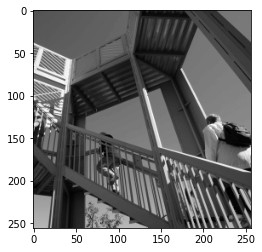

In [58]:
img_pooled = avgpool(img,size_x,size_y,2)

# Plot the image. Note the size of the axes -- they are 256 by 256
plt.gray()
plt.grid(False)
plt.imshow(img_pooled)
plt.show()  

# A Convolution followed by Max-pooling

Here we see a basic module of a convolutioal neural network at its base. We first pass the image through a filter which can detect a specific pattern in an image and then max-pooling can be used to subsample an image to a smaller dimansion space and also make the image simpler for the neural network so it only has to detect a group of patterns rather than a representation of a pattern.
 

In [59]:
img_orignal = misc.ascent()

img_transformed = np.copy(img_orignal)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]
weight = 1

img_transformed = convolute(img_orignal,size_x,size_y,kernel_2h)
# img_transformed = convolute(img_orignal,size_x,size_y,kernel_2v)
# What difference would it make if we detect vertical or horizontal?
img_pooled = maxpool(img_transformed,size_x,size_y,2)

Now there is a reason we have made stagnant filters here. For the ease of explanation. We do not actually specify the filters to a `Conv2D` Layer of a CNN. But still lets see what happens when we pass an image thorugh different forms of filters serially.

In [60]:
size_x = img_pooled.shape[0]
size_y = img_pooled.shape[1]
img_transformed = convolute(img_pooled,size_x,size_y,kernel_2v)
img_pooled =  maxpool(img_transformed,size_x,size_y,2)

## Question 4

How does a combination of convolutional and max-pool layers determine a certain pattern like edges, corners etc? How did passing an image through that combination affect the image? 

Would it give a different result if you passed it through a vertical and then a horizontal filter? Is it the same as the function of a CNN module?
 
Try it out in the above code cell.

There are types of layers that can find the edges plotted in a specific image. The combination of the max-pool and convolutional layers helps to find the greatest values of the pixels in the image and using the filters to find edges and corners in the image. This may make the image more difficult to see, as the only features that will be shown are the corners or edges there in the image. It will give a different result if you passed the pixel image through a vertical and then a horizontal filter since there will have more white pieces of the image. It is the same as the function of the CNN module, since they produce very similar results in the filters.

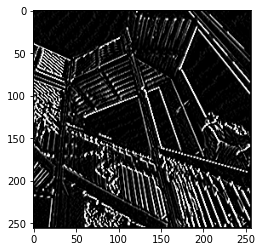

In [61]:
# Plot the image. Note the size of the axes -- they are 256 by 256
plt.gray()
plt.grid(False)
plt.imshow(img_transformed)
#plt.axis('off')
plt.show() 

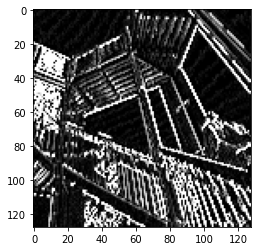

In [62]:
# Plot the image. Note the size of the axes -- they are 256 by 256
plt.gray()
plt.grid(False)
plt.imshow(img_pooled)
#plt.axis('off')
plt.show() 

As you may have realized, a series of CNN modules is not nessecarily the same as a series of equivalent functions. A CNN performs many filters on an image and then learns which series of filters can aggregate more complex patterns most generally for the class of images.

#Fun Resource
 https://experiments.withgoogle.com/what-neural-nets-see

This is a resource made available by google which helps us visualize what layer see of an image/video.

## Question 5
Why do we convolute an image before passing it to a max-pool layer?

How does the max pool filter size affect the pipeline? What would be the most effective max pool filter size in a general case?

Would it affect the convolution process?

We convolute an image with the layers to filter these numbers of pixels and then pass it to the max-pool layer so that we can take the greatest pixel from the lists and use this to find edges or corners of these types of pixels in the image. The max pool filter size is larger and allows multiple analyses of the types in pixels. This allows for larger types of features there to be detected by the convolution dataset. The most effective max pool filter size is 2 by 2 which makes more general images with less pixels to identify these types of features in the prediction, and max pooling size would negatively affect the convolution process as the images would be smaller before going through the convolution layer and so there would be less amount of batch sizes and less of the image would go through the layer so there would be lessened accuracy.

#Average Pooling

Average pooling is another type of pooling, and that's where you take the average value from each region rather than the max.

Currently max pooling is used vastly more than average pooling, but I did just want to mention that point. Alright, now let's jump over to TensorFlow and see how this is done in code.


#Convolutuion Neural Networks(CNN)
CNNs are always made up of convolution layers and regularization methods (to be covered later). Except we do not specify the filters in a deep learning module, a machine learning model learns its filters as well. We specify the size of layers to be used. And we can specify how dimensions are reduced.

Convolutions layers find patterns from filters in a specified image and a series of such layers with appropriate regularization techniques can efficiently identify more complex composite patterns built from more basic patterns like the edge detection we have seen before.

In [63]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

2.8.2
4431872/4422102 [==============================] - 0s 0us/step


Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

1. The number of convolutions you want to generate.

Purely arbitrary, but good to start with something in the order of 32.

2. The size of the Convolution, in this case a 3x3 grid

3. The activation function to use -- in this case we'll use `relu`, which you might recall is the equivalent of returning x when x>0, else returning 0

In the first layer, the shape of the input data.

You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. 

In [64]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [65]:
model.fit(training_images, training_labels, epochs=5)
print("\nEvaluating the model.")
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.4720 - accuracy: 0.8277
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3216 - accuracy: 0.8828
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2720 - accuracy: 0.9009
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2434 - accuracy: 0.9095
Epoch 5/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2170 - accuracy: 0.9188

Evaluating the model.
313/313 [==============================] - 3s 8ms/step - loss: 0.2785 - accuracy: 0.8958


## Question 6
Write the difference between ```sparse_categorical_crossentropy ```
, ```categorical_crossentropy``` and ```binary_crossentropy```.

The sparse_categorical_crossentropy determines these numbers for the complete percentage chance that the numbers belong to a specific category. The next losses is categorical_crossentropy which is used to find the prediction of the numbers in the percentage chance that these belong to each category. The next losses is the binary_crossentropy used to find loss for binary.

## Optional Experiment  
Try running it for more epochs -- say about 20 or even 25, and explore the results! But while the results might seem really good, the validation results may actually go down, due to something called 'overfitting' which will be discussed later.

When would this model in this case start overfitting?

(In a nutshell, 'overfitting' occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at seeing other data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it, but blue suade shoes might confuse you...and you know you should never mess with my blue suede shoes.)

Around 19 epochs.

# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The `print(test_labels[;100])` shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [66]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


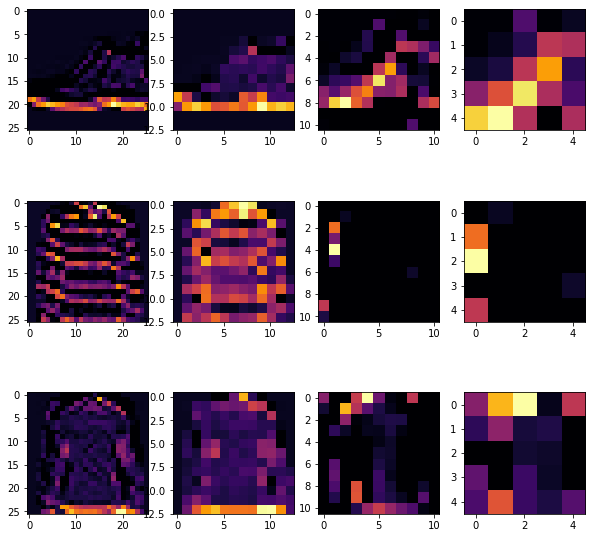

In [67]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4, figsize=(10,10))
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In essence what a convolutional neural network does, is it simplifies or dumbs down the complex patterns an image can have to a smaller dimensionality while keeping the the interdependentness they may have to all the elements within an image. 

A CNN always have one or more dense fully connected layers we learnt about before which learns from these smaller set of patterns. So a CNN does essentially do what a regular NN does but with a form of pattern complexity reduction.   

##Bonus Question 

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

The training time increases with more convolutions, and the accuracy increases as well.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

The training time will decrease. The percentage accuracy will increase in prediction.

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

This decreases the accuracy and increases the training prediction time.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

This will decrease the training time. The accuracy will be increased.

5. Implement a callback to check on the loss function and to cancel training once it hit a certain amount.

6. Directly send the image to the last 10 classes without the second last Fully connected layer. How does that affect accuracy and convergence?

The last layer makes the accuracy of the set increase and the convergence is decreasing.

In [68]:
""" Modify the code here for the Bonus Question here """
import keras
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
optimize = tf.keras.callbacks.EarlyStopping(monitor = "loss", baseline = 0.19)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks = optimize)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1532 - accuracy: 0.9542
Epoch 2/10
313/313 [==============================] - 3s 8ms/step - loss: 0.0480 - accuracy: 0.9846
0.9846000075340271


# **Upload this Day 6 Colab Notebook to your Github repository under "Day 6" folder. Also add your *Reflection* on today's learning in README.md**

Sources:
https://github.com/lmoroney/mlday-tokyo